# Exercise 1

 Explain to a non-technical colleague what cross-validation is and why we use it, in a maximum of 100 words.

Cross-validation checks how well a model will perform on new data. It splits the data into two parts, using one to train the model and the other to test it. This helps avoid overfitting, where a model works well on training data but poorly on new data. Two common types are Leave-One-Out (LOOCV) and K-Folds. LOOCV tests each data point individually, while K-Folds splits the data into groups (5-10) for manageable testing. Cross-validation provides a more reliable estimate of the model's true performance.

# Exercise 2

Explain to a non-technical colleague what bootstrapping is and why we use it, in a maximum of 100 words.

Bootstrapping is a method used to estimate the uncertainty of a statistic (ex: mean and median) by repeatedly drawing different samples of the data with a replacement. This helps us understand how much a result might vary for real data, especially when the dataset is small or contains outliers. For example, if you are evaluating two products with known defects, bootstrapping helps quantify the uncertainty by giving a clearer picture of which product carries less risk.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)

In [13]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)
from functools import partial
from sklearn.model_selection import \
(cross_validate ,
KFold ,
ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

# Exercise 3

In [18]:
#Load the Auto Dataset
auto = load_data('Auto')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


## 3.a

a. Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:
Auto['mpg01'] = mpg01

In [19]:
#Binary variable, mpg01
mpg_med = auto['mpg'].median()

mpg01 = (auto['mpg'] > mpg_med).astype(int)

auto['mpg01']=mpg01
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2,1
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,1


## 3.b

b. Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

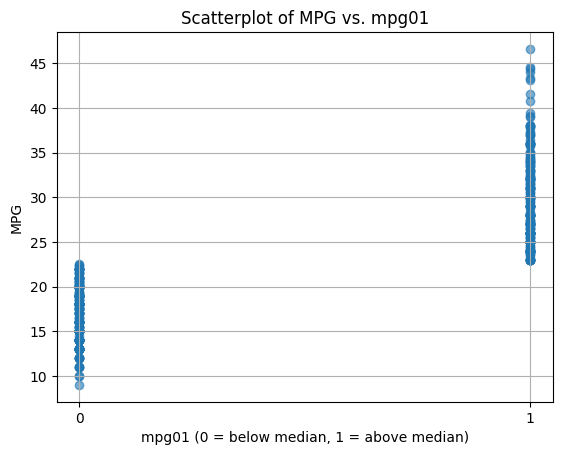

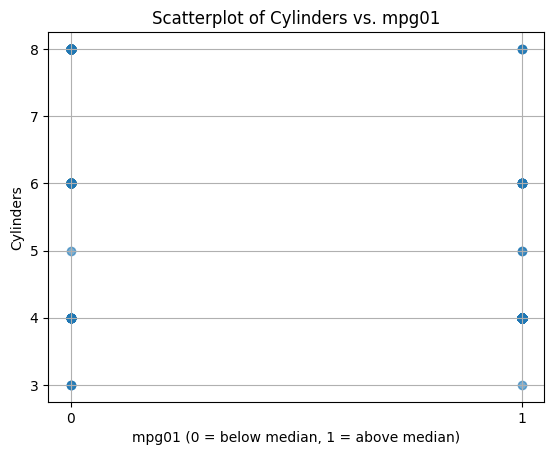

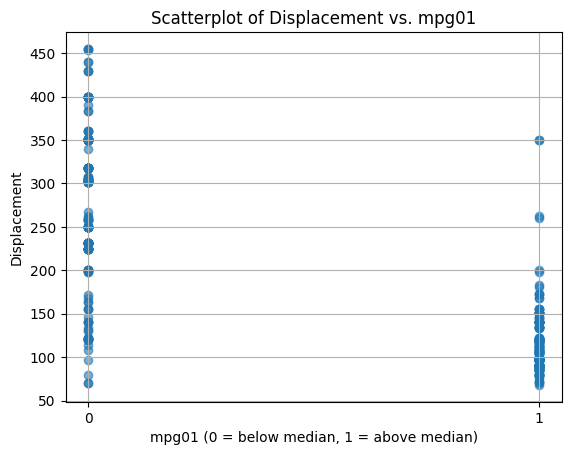

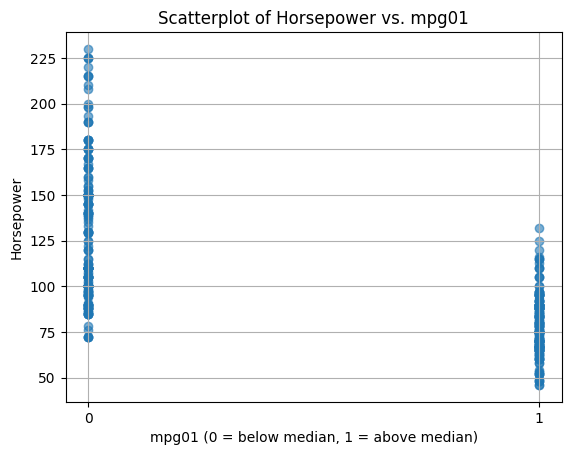

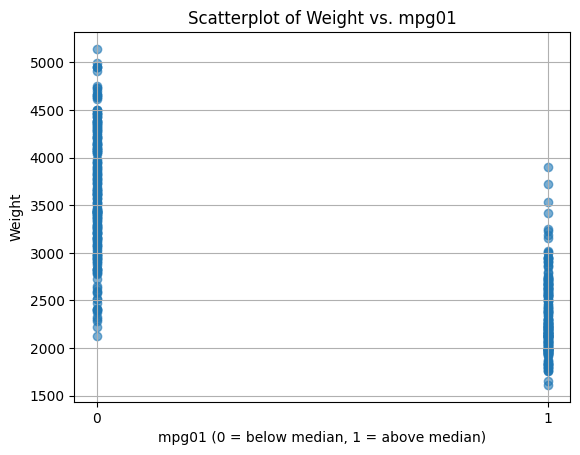

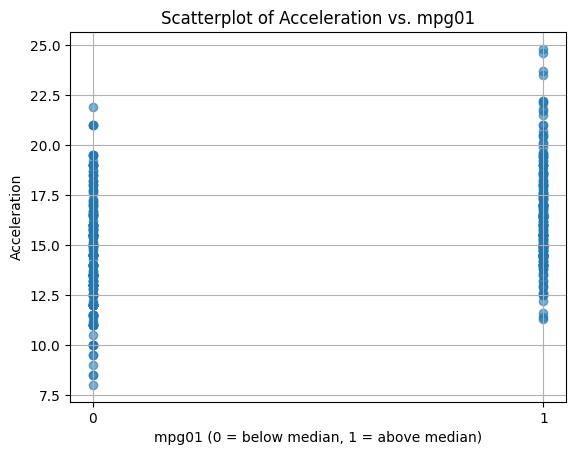

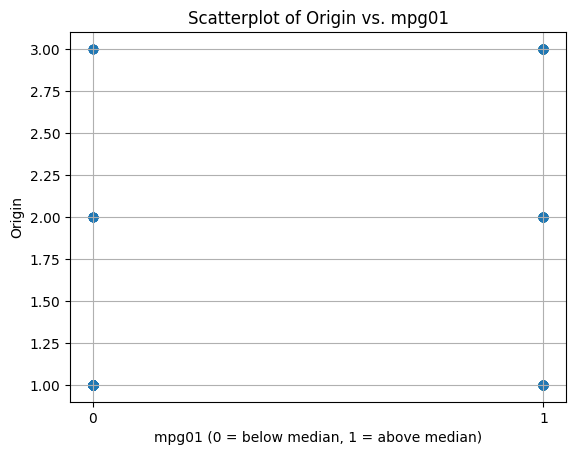

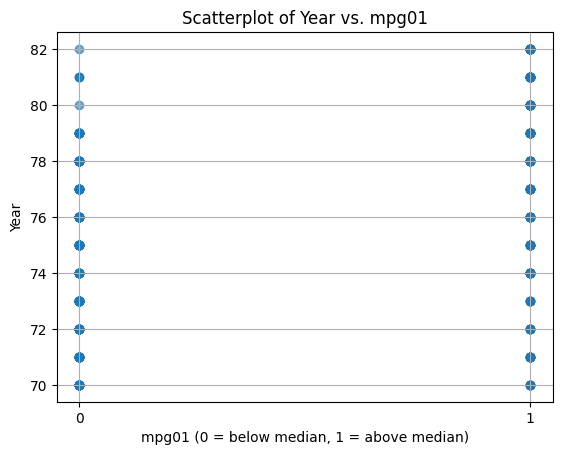

In [20]:
# Auto Scatter Plots
plt.scatter(auto['mpg01'], auto['mpg'], alpha=0.6)
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('MPG')
plt.title('Scatterplot of MPG vs. mpg01')
plt.xticks([0, 1])
plt.grid()
plt.show()


plt.scatter(auto['mpg01'], auto['cylinders'], alpha=0.6)
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Cylinders')
plt.title('Scatterplot of Cylinders vs. mpg01')
plt.xticks([0, 1])
plt.grid()
plt.show()


plt.scatter(auto['mpg01'], auto['displacement'], alpha=0.6)
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Displacement')
plt.title('Scatterplot of Displacement vs. mpg01')
plt.xticks([0, 1])
plt.grid()
plt.show()


plt.scatter(auto['mpg01'], auto['horsepower'], alpha=0.6)
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Horsepower')
plt.title('Scatterplot of Horsepower vs. mpg01')
plt.xticks([0, 1])
plt.grid()
plt.show()


plt.scatter(auto['mpg01'], auto['weight'], alpha=0.6)
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Weight')
plt.title('Scatterplot of Weight vs. mpg01')
plt.xticks([0, 1])
plt.grid()
plt.show()


plt.scatter(auto['mpg01'], auto['acceleration'], alpha=0.6)
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Acceleration')
plt.title('Scatterplot of Acceleration vs. mpg01')
plt.xticks([0, 1])
plt.grid()
plt.show()


plt.scatter(auto['mpg01'], auto['origin'], alpha=0.6)
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Origin')
plt.title('Scatterplot of Origin vs. mpg01')
plt.xticks([0, 1])
plt.grid()
plt.show()


plt.scatter(auto['mpg01'], auto['year'], alpha=0.6)
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Year')
plt.title('Scatterplot of Year vs. mpg01')
plt.xticks([0, 1])
plt.grid()
plt.show()

<Axes: title={'center': 'year'}, xlabel='mpg01'>

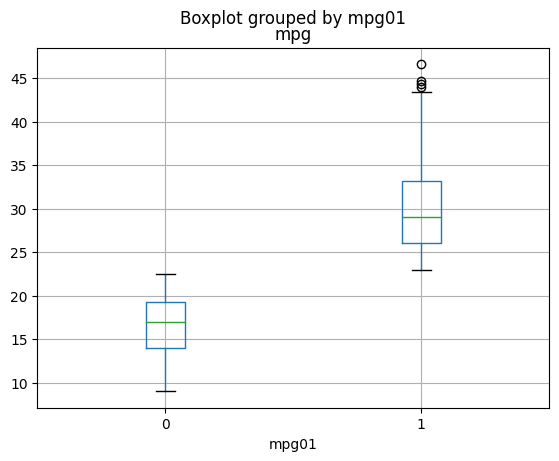

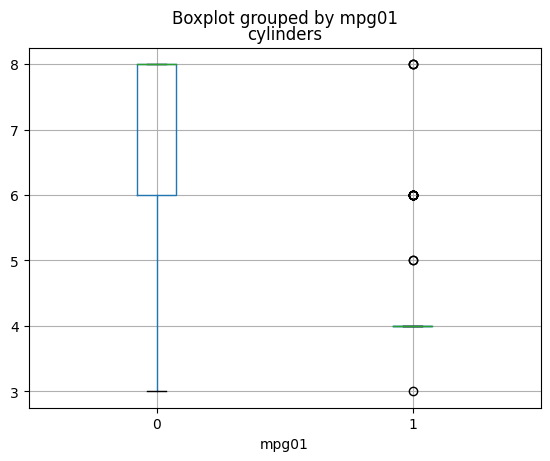

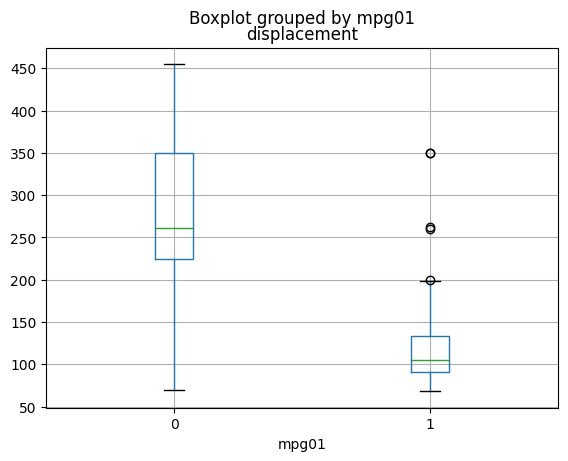

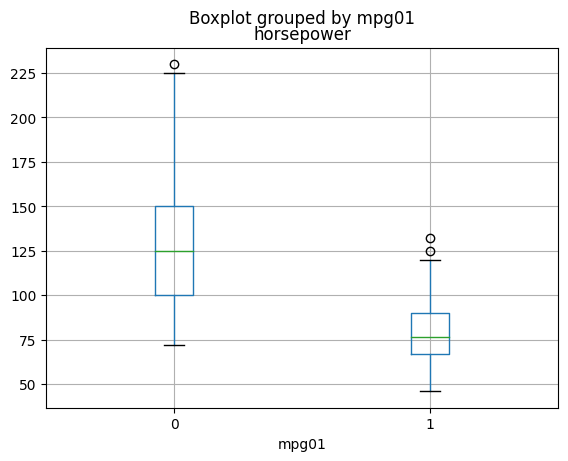

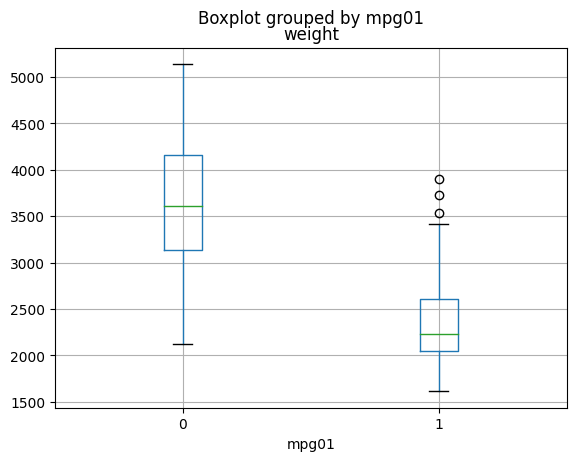

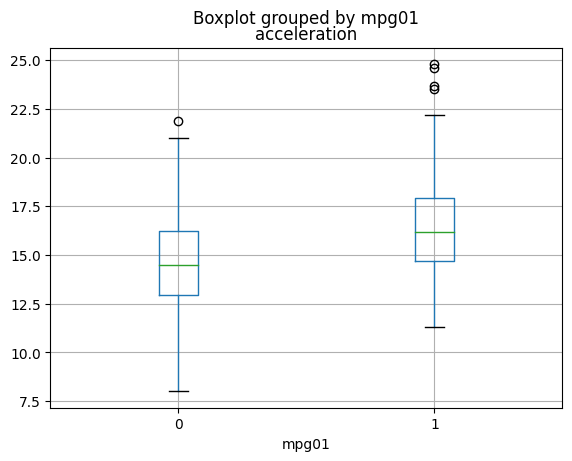

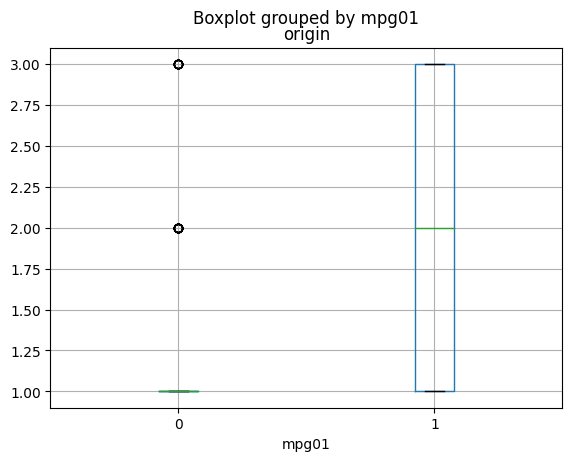

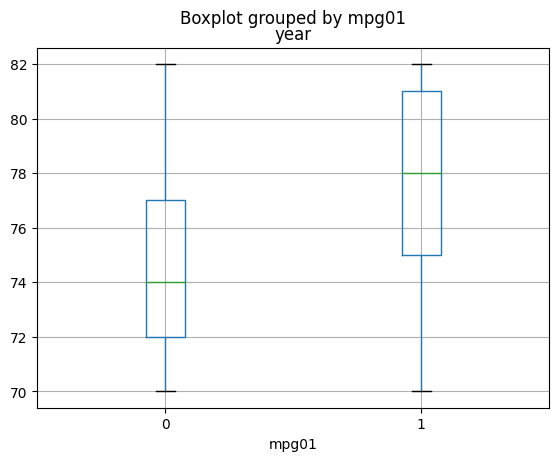

In [21]:
# Auto Box plots
auto.boxplot('mpg', by = 'mpg01')

auto.boxplot('cylinders', by = 'mpg01')

auto.boxplot('displacement', by = 'mpg01')

auto.boxplot('horsepower', by = 'mpg01')

auto.boxplot('weight', by = 'mpg01')

auto.boxplot('acceleration', by = 'mpg01')

auto.boxplot('origin', by = 'mpg01')

auto.boxplot('year', by = 'mpg01')


The plots that show the most separation, between the 0 and 1 values, are likely useful for predicting mpg01. These variables include Cylinders, Displacement, Horsepower, and Weight. MPG01 is MPG so this variable will be excluded. The separation between the 0 and 1 values indicates that the variable is a good predictor of mpg01. The above boxplots provide a clearer picture of the separation in the MPG, Displacement, Horsepower, and Weight variables.

## 3.c

(c) Split the data into a training set and a test set.

In [23]:
#Splitting the Dataset
Auto_X = auto[['cylinders', 'displacement', 'horsepower', 'weight']]
Auto_y = auto['mpg01']

Auto_X_train, Auto_X_test, Auto_y_train, Auto_y_test = train_test_split(Auto_X, Auto_y, test_size=0.2, random_state=42, stratify=Auto_y)




## 3.d

(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
b. What is the test error of the model obtained?

In [24]:
#LDA Auto Model
lda = LDA()
lda.fit(Auto_X_train, Auto_y_train)

LinearDiscriminantAnalysis()

In [25]:
Auto_lda_pred = lda.predict(Auto_X_test)

In [26]:
confusion_table(Auto_lda_pred , Auto_y_test)

Truth,0,1
Predicted,,
0,34,3
1,6,36


In [27]:
(34 +36)/79, np.mean(Auto_lda_pred == Auto_y_test)

(0.8860759493670886, 0.8860759493670886)

The output code above represents the prediction accuracy rate for the LDA model. The number of correct predictions (34 + 36) is divided by the total number of predictions made (34 +36 + 6 +3).

In [28]:
Auto_test_error_lda = 1 - 0.8860759493670886

print(Auto_test_error_lda)

0.11392405063291144


The above value is the test error rate for the LDA model.

## 3.e

(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
b. What is the test error of the model obtained?

In [29]:
#QDA Auto Model
qda = QDA()

qda.fit(Auto_X_train, Auto_y_train)










QuadraticDiscriminantAnalysis()

In [30]:
Auto_qda_pred = qda.predict(Auto_X_test)

In [31]:
confusion_table(Auto_qda_pred , Auto_y_test)

Truth,0,1
Predicted,,
0,34,3
1,6,36


In [32]:
(34 + 36)/79, np.mean(Auto_qda_pred == Auto_y_test)

(0.8860759493670886, 0.8860759493670886)

Again, the above value is the accuracy prediction rate of the QDA model. (34 +36) or the number of correct predictions and it is divided by the total number of predictions (79).

In [144]:
Auto_test_error_qda = 1 - 0.8860759493670886

print(Auto_test_error_qda)

0.11392405063291144


The above value is the test error rate for the QDA model.

## 3.f

(f) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [33]:
#Log Reg Auto Model
log_reg = LogisticRegression()

log_reg.fit(Auto_X_train, Auto_y_train)









LogisticRegression()

In [34]:
Auto_log_pred = log_reg.predict(Auto_X_test)

In [35]:
confusion_table(Auto_log_pred , Auto_y_test)

Truth,0,1
Predicted,,
0,36,4
1,4,35


In [36]:
(36 + 35)/79, np.mean(Auto_log_pred == Auto_y_test)

(0.8987341772151899, 0.8987341772151899)

The value above is the accuracy rate for the log reg model. This was determined by taking the total correctly made predictions divided by the total number of predictions.

In [37]:
Auto_test_error_log = 1 - 0.8987341772151899

print(Auto_test_error_log)

0.10126582278481011


The value above is the test error rate for the log reg model.

## 3.g

(g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?

In [38]:
#NB Auto Model
NB = GaussianNB()

NB.fit(Auto_X_train, Auto_y_train)









GaussianNB()

In [39]:
Auto_nb_pred = NB.predict(Auto_X_test)

In [40]:
confusion_table(Auto_nb_pred , Auto_y_test)

Truth,0,1
Predicted,,
0,34,3
1,6,36


In [41]:
(34 + 36)/79, np.mean(Auto_nb_pred == Auto_y_test)

(0.8860759493670886, 0.8860759493670886)

The above value is the accuracy prediction rate for the NB model. Again, I took the total number of correct predictions divided by the total amount of predictions made (34 +36 / 79).

In [42]:
Auto_test_error_nb = 1 -0.8860759493670886

print(Auto_test_error_nb)

0.11392405063291144


The above value is the test error rate for the NB model.

## 3.h

(h) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [43]:
#KNN 1 Auto Model
Auto_X_train, Auto_X_test, Auto_y_train, Auto_y_test = train_test_split(Auto_X, Auto_y, test_size=0.2, random_state=42, stratify=Auto_y)

In [44]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

scaler.fit(Auto_X_train)

StandardScaler()

In [45]:
Auto_X_train_std = scaler.transform(Auto_X_train)

Auto_X_test_std = scaler.transform(Auto_X_test)

In [46]:
knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(Auto_X_train, Auto_y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
Auto_knn1_pred = knn1.predict(Auto_X_test)

In [48]:
confusion_table(Auto_knn1_pred , Auto_y_test)

Truth,0,1
Predicted,,
0,33,6
1,7,33


In [49]:
(33 + 33)/ 79, np.mean(Auto_knn1_pred == Auto_y_test)

(0.8354430379746836, 0.8354430379746836)

The above values are the accuarcy prediction rate for the KNN1 model.

In [50]:
Auto_test_error_knn1 = 1 - 0.8354430379746836

print(Auto_test_error_knn1)

0.16455696202531644


The above value is the test error rate for the KNN1 model.

In [51]:
#KNN 3 Auto Model
Auto_X_train, Auto_X_test, Auto_y_train, Auto_y_test = train_test_split(Auto_X, Auto_y, test_size=0.2, random_state=42, stratify=Auto_y)

In [52]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

scaler.fit(Auto_X_train)

StandardScaler()

In [53]:
Auto_X_train_std = scaler.transform(Auto_X_train)

Auto_X_test_std = scaler.transform(Auto_X_test)

In [54]:
knn3 = KNeighborsClassifier(n_neighbors=3)

knn3.fit(Auto_X_train, Auto_y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
Auto_knn3_pred = knn3.predict(Auto_X_test)

In [56]:
confusion_table(Auto_knn3_pred , Auto_y_test)

Truth,0,1
Predicted,,
0,34,7
1,6,32


In [57]:
(34 +32)/79, np.mean(Auto_knn3_pred == Auto_y_test)

(0.8354430379746836, 0.8354430379746836)

The above values is the accuracy prediction rate for the KNN3 model.

In [58]:
Auto_test_error_knn3 = 1 - 0.8354430379746836

print(Auto_test_error_knn3)

0.16455696202531644


The above value is the test error rate for the KNN3 model.

In [59]:
#KNN 10 Auto Model
Auto_X_train, Auto_X_test, Auto_y_train, Auto_y_test = train_test_split(Auto_X, Auto_y, test_size=0.2, random_state=42, stratify=Auto_y)

In [60]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

scaler.fit(Auto_X_train)

StandardScaler()

In [61]:
Auto_X_train_std = scaler.transform(Auto_X_train)

Auto_X_test_std = scaler.transform(Auto_X_test)

In [62]:
knn10 = KNeighborsClassifier(n_neighbors=10)

knn10.fit(Auto_X_train, Auto_y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
Auto_knn10_pred = knn10.predict(Auto_X_test)

In [64]:
confusion_table(Auto_knn10_pred , Auto_y_test)

Truth,0,1
Predicted,,
0,35,6
1,5,33


In [65]:
(35 + 33)/79, np.mean(Auto_knn10_pred == Auto_y_test)

(0.8607594936708861, 0.8607594936708861)

The above values are the prediction accuracy score for the KNN10 model.

In [66]:
Auto_test_error_knn10 = 1 - 0.8607594936708861

print(Auto_test_error_knn10)

0.1392405063291139


The above value is the test error rate for the KNN10 model.

In [67]:
#KNN 20  Auto Model
Auto_X_train, Auto_X_test, Auto_y_train, Auto_y_test = train_test_split(Auto_X, Auto_y, test_size=0.2, random_state=42, stratify=Auto_y)

In [68]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

scaler.fit(Auto_X_train)

StandardScaler()

In [69]:
Auto_X_train_std = scaler.transform(Auto_X_train)

Auto_X_test_std = scaler.transform(Auto_X_test)

In [70]:
knn20 = KNeighborsClassifier(n_neighbors=20)

knn20.fit(Auto_X_train_std, Auto_y_train)

KNeighborsClassifier(n_neighbors=20)

In [71]:
Auto_knn20_pred = knn20.predict(Auto_X_test_std)

In [72]:
confusion_table(Auto_knn20_pred , Auto_y_test)

Truth,0,1
Predicted,,
0,34,3
1,6,36


In [73]:
(38 + 34)/79, np.mean(Auto_knn20_pred == Auto_y_test)

(0.9113924050632911, 0.8860759493670886)

The above values are the prediction accuracy score for the KNN20 model.

In [74]:

Auto_test_error_knn20 = 1 - 0.9113924050632911

print(Auto_test_error_knn20)

0.08860759493670889


The above value is the test error rate for the KNN20 model.

It seems that the higher KNN values perform better for this model. Knn20 achieved a 91% correct prediction rate or a 9% test error score, whereas Knn1 achieved an 83.5% correct prediction rate or a 16% test error score. Knn20 achieved the best model performance on this dataset. By ignoring some of the local data points (neighbors), the model generally fits better. However, the higher increase in distance between neighboring data points could lead to increased bias within the model, since higher K values may miss patterns within the data. The difference in the test error rates, within the K models, shows the trade-offs between bias and variance.

# Exercise 4

Complete Question 16 in Chapter 4 of ISL, but predict whether pupil-teacher ratio is above
or below the median, instead of crime rate as the question originally asks. (The good news
is that you already did part of this question in the last assignment!). Annotate your code
carefully and describe your findings in words.

Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, naive Bayes, and KNN models using
various subsets of the predictors. Describe your findings.
Hint: You will have to create the response variable yourself, using the
variables that are contained in the Boston data set.

In [75]:
boston = load_data("Boston")
print(boston.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


## Predictor Subsets and Response Variable

In [76]:
#Predictor Subsets and Response Variable
X1 = boston[['crim', 'indus', 'dis']]

X2= boston[['chas', 'age', 'tax']]

X3 = boston[['lstat', 'medv', 'nox']]

X4 = boston[['rad', 'zn', 'rm']]

y_Boston = np.where(boston['ptratio'] > boston['ptratio'].median(), 1, 0)

boston['ptratio_above_median'] = y_Boston


## X1 Subset of Predictors using logistic regression

In [78]:
# X1 Subset of Predictors using logistic regression
Boston1_X_train, Boston1_X_test, Boston1_y_train, Boston1_y_test = train_test_split(X1, y_Boston, test_size=0.2, random_state=42)

In [79]:
Boston_log_reg = LogisticRegression()

Boston_log_reg.fit(Boston1_X_train, Boston1_y_train)

LogisticRegression()

In [80]:
Boston_log_pred = Boston_log_reg.predict(Boston1_X_test)

In [81]:
confusion_table(Boston_log_pred , Boston1_y_test)

Truth,0,1
Predicted,,
0,42,21
1,1,38


In [84]:
Boston_accuracy_log = (38 + 42)/ 102, np.mean(Boston_log_pred == Boston1_y_test)
print(Boston_accuracy_log)

(0.7843137254901961, 0.7843137254901961)


I used the values from the confusion table to find the prediction accuracy rate for the Boston log reg model. I added 42 + 38 (80) and divided that sum by the total number of predictions (102).

In [85]:
Boston_test_error_log = 1 - .7843137254901961
print(Boston_test_error_log)

0.21568627450980393


I used the prediction accuracy rate from the confusion table to find the test error rate. The test error rate is about .215, meaning that the model is incorrect about 21.5% of the time. This is found by taking 1 or 100% and subtracting the accuracy prediction rate ~78.4% for this model.

## X2 Subset of Predictors using LDA

In [86]:
# X2 Subset of Predictors using LDA
Boston2_X_train, Boston2_X_test, Boston2_y_train, Boston2_y_test = train_test_split(X2, y_Boston, test_size=0.2, random_state=42)

In [87]:
lda = LDA()

lda.fit(Boston2_X_train, Boston2_y_train)

LinearDiscriminantAnalysis()

In [88]:
Boston_lda_pred = lda.predict(Boston2_X_test)

In [89]:
confusion_table(Boston_lda_pred , Boston2_y_test)

Truth,0,1
Predicted,,
0,42,21
1,1,38


In [90]:
Boston_accuracy_lda = (38 + 42)/ 102, np.mean(Boston_lda_pred == Boston2_y_test)
print(Boston_accuracy_lda)

(0.7843137254901961, 0.7843137254901961)


I used the values from the confusion table to find the prediction accuracy rate for the Boston lda model. I added 42 + 38 (80) and divided that sum by the total number of predictions (102).

In [91]:
Boston_test_error_lda = 1 - 0.7843137254901961
print(Boston_test_error_lda)

0.21568627450980393


I used the prediction accuracy rate from the confusion table to find the test error rate. The test error rate is about .215, meaning that the model is incorrect about 21.5% of the time. This is found by taking 1 or 100% and subtracting the accuracy prediction rate ~78.4% for this model.

## X3 Subset of Predictors using NB

In [92]:
# X3 Subset of Predictors using NB
Boston3_X_train, Boston3_X_test, Boston3_y_train, Boston3_y_test = train_test_split(X3, y_Boston, test_size=0.2, random_state=42)

In [93]:
nb = GaussianNB()

nb.fit(Boston3_X_train, Boston3_y_train)

GaussianNB()

In [94]:
Boston_nb_pred = nb.predict(Boston3_X_test)

In [95]:
confusion_table(Boston_nb_pred , Boston3_y_test)

Truth,0,1
Predicted,,
0,35,16
1,8,43


In [96]:
Boston_accuracy_nb = (35+ 43)/102, np.mean(Boston_nb_pred == Boston3_y_test)
print(Boston_accuracy_nb)

(0.7647058823529411, 0.7647058823529411)


I used the values from the confusion table to find the prediction accuracy rate for the Boston nb model. I added 35 + 43 (80) and divided that sum by the total number of predictions (102).

In [97]:
Boston_test_error_nb = 1 - 0.7647058823529411
print(Boston_test_error_nb)

0.23529411764705888


I used the prediction accuracy rate from the confusion table to find the test error rate. The test error rate is about .235, meaning that the model is incorrect about 23.5% of the time. This is found by taking 1 or 100% and subtracting the accuracy prediction rate ~76.5% for this model.

## X4 Subset of Predictors using KNN with 3 neighbors

In [98]:
# X4 Subset of Predictors using KNN with 3 neighbors
Boston4_X_train, Boston4_X_test, Boston4_y_train, Boston4_y_test = train_test_split(X4, y_Boston, test_size=0.2, random_state=42)

In [99]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

scaler.fit(Boston4_X_train)

StandardScaler()

In [100]:
Boston4_X_train_std = scaler.transform(Boston4_X_train)

Boston4_X_test_std = scaler.transform(Boston4_X_test)

In [101]:
Boston_knn3 = KNeighborsClassifier(n_neighbors=3)

Boston_knn3.fit(Boston4_X_train_std, Boston4_y_train)

KNeighborsClassifier(n_neighbors=3)

In [102]:
Boston_knn3_pred = Boston_knn3.predict(Boston4_X_test_std)

In [103]:
confusion_table(Boston_knn3_pred , Boston4_y_test)

Truth,0,1
Predicted,,
0,33,15
1,10,44


In [104]:
Boston_accuracy_knn3 = (33 + 44)/ 102, np.mean(Boston_knn3_pred == Boston4_y_test)
print(Boston_accuracy_knn3)

(0.7549019607843137, 0.7549019607843137)


I used the values from the confusion table to find the prediction accuracy rate for the Boston knn3 model. I added 33 + 44 (77) and divided that sum by the total number of predictions (102).

In [105]:
Boston_test_error_knn3 = 1 - 0.7549019607843137
print(Boston_test_error_knn3)

0.2450980392156863


I used the prediction accuracy rate from the confusion table to find the test error rate. The test error rate is about .245, meaning that the model is incorrect about 24.5% of the time. This is found by taking 1 or 100% and subtracting the accuracy prediction rate ~75.5% for this model.

## X4 Subset of Predictors using KNN with 10 neighbors

In [106]:
# X4 Subset of Predictors using KNN with 10 neighbors
Boston4_X_train, Boston4_X_test, Boston4_y_train, Boston4_y_test = train_test_split(X4, y_Boston, test_size=0.2, random_state=42)

In [107]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

scaler.fit(Boston4_X_train)

StandardScaler()

In [108]:
Boston4_X_train_std = scaler.transform(Boston4_X_train)

Boston4_X_test_std = scaler.transform(Boston4_X_test)

In [109]:
Boston_knn10 = KNeighborsClassifier(n_neighbors=10)

Boston_knn10.fit(Boston4_X_train_std, Boston4_y_train)

KNeighborsClassifier(n_neighbors=10)

In [110]:
Boston_knn10_pred = Boston_knn10.predict(Boston4_X_test_std)

In [111]:
confusion_table(Boston_knn10_pred , Boston4_y_test)

Truth,0,1
Predicted,,
0,33,20
1,10,39


In [112]:
Boston_accuracy_knn10 = (33 + 39)/ 102, np.mean(Boston_knn10_pred == Boston4_y_test)

print(Boston_accuracy_knn10)

(0.7058823529411765, 0.7058823529411765)


I used the values from the confusion table to find the prediction accuracy rate for the Boston knn10 model. I added 33 + 39 (72) and divided that sum by the total number of predictions (102).

In [113]:
Boston_test_error_knn10 = 1 - 0.7058823529411765

print(Boston_test_error_knn10)

0.2941176470588235


I used the prediction accuracy rate from the confusion table to find the test error rate. The test error rate is about .294, meaning that the model is incorrect about 29.4% of the time. This is found by taking 1 or 100% and subtracting the accuracy prediction rate ~70.6% for this model.

From my findings, the LDA and logistic regression models performed the best out of the five different models. I used four different predictor subsets for the response variable, and it is likely that certain subsets of the predictors aligned better with the response variable. Both the LDA and logistic regression models achieved an accuracy score of 78%, meaning they were correct 78% of the time out of all total predictions. Despite this, all models performed fairly well, with none achieving an accuracy value below 70%. The KNN model with 10 neighbors achieved the lowest accuracy score at 70.6%, representing a 5% decrease in performance compared to the KNN model with 3 neighbors. This suggests that increasing the number of neighbors or incorporating closer data points, may overlook important patterns that affect the model's performance.



# Exercise 5

The data FirstYearGPA in the Stat2Data R package contains measurements on 219 college
students. The response variable is GPA (grade point average after one year of college). Directions
for how to access the data are below. Note that you’ll need to retreive the data in R,
and then you can use it in Python. Answer the following questions:

In [117]:
#Had to manually upload FirstYearGPA csv file from local drive.
from google.colab import files

uploaded = files.upload()

Saving FirstYearGPA.csv to FirstYearGPA (1).csv


In [120]:
#Read the FirstYearGPA Dataset
FirstYearGPA = pd.read_csv('FirstYearGPA.csv')
FirstYearGPA.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1


## 5.a

a. Split the data into training and test sets, with 70% training and the remaining for test.
Fit a multiple linear regression to predict GPA using HSGPA, HU, and White. Calculate
the mean squared error for the training error and the test error. Make sure to set a
seed. Write a few sentences that summarize your findings.

In [133]:
#Splitting the Data
GPA_X = FirstYearGPA[['HSGPA', 'HU', 'White']]
GPA_y = FirstYearGPA['GPA']

GPA_X_train, GPA_X_test, GPA_y_train, GPA_y_test = train_test_split(GPA_X, GPA_y, test_size=0.3, random_state=28)


In [134]:
#Both need an intercept
GPA_X_train = sm.add_constant(GPA_X_train)
GPA_X_test = sm.add_constant(GPA_X_test)

In [135]:
#Multi-Linear Regression Model
GPA_X = MS(['HSGPA', 'HU', 'White']).fit_transform(FirstYearGPA)
GPA_model = sm.OLS(GPA_y, GPA_X)
GPA_results = GPA_model.fit()
summarize(GPA_results)

,coef,std err,t,P>|t|
intercept,0.9335,0.246,3.800,0.0
HSGPA,0.5074,0.070,7.228,0.0
HU,0.0153,0.004,4.180,0.0
White,0.2656,0.065,4.117,0.0


In [136]:
#Making Predictions
GPA_y_train_pred = GPA_results.predict(GPA_X_train)
GPA_y_test_pred = GPA_results.predict(GPA_X_test)

In [137]:
#Training set Mean Square Error
GPA_train_mse = np.mean((GPA_y_train - GPA_y_train_pred) ** 2)

print(GPA_train_mse)

0.13836022434049228


In [138]:
#Test set Mean Square Error
GPA_test_mse = np.mean((GPA_y_test - GPA_y_test_pred) ** 2)

print(GPA_test_mse)

0.16369393199674742


Both the training and test mean squared errors (MSE), 0.14 and 0.16 respectively, are relatively close to each other, suggesting that the model is fitting the data well and is capable of predicting future outcomes effectively. However, with an MSE score of approximately 0.16, which is quite high considering that GPAs typically range from 0.0 to 4.0, this indicates a significant prediction error within the model. This high MSE suggests that the model may not be capturing all the underlying patterns in the data, resulting in larger discrepancies between the predicted and actual GPA values.

## 5.b

b. Now do LOOCV and k-fold cross validation instead of using a test and training set.
Give the final CV MSEs. Write a few sentences that summarizes your methodology and
findings.

In [140]:
#Splitting the FirstYearGPA dataset and setting the seed
FirstYearGPA.shape

GPA_train, GPA_valid = train_test_split(FirstYearGPA,
                                       test_size=109,
                                       random_state=28)


In [141]:
#LOOCV
GPA_model = sklearn_sm(sm.OLS,
                      MS(['HSGPA','HU','White']))

GPA_X, GPA_Y = FirstYearGPA.drop(columns=['GPA']), FirstYearGPA['GPA']

cv_results = cross_validate(GPA_model,
                           GPA_X,
                           GPA_Y,
                           cv=FirstYearGPA.shape[0])

cv_err = np.mean(cv_results['test_score'])

print(cv_err)

0.15152343270406335


In [143]:
#K-folds

GPA_model = sklearn_sm(sm.OLS,
                       MS(['HSGPA', 'HU', 'White']))

k_folds_cv = KFold(n_splits=10, shuffle=True, random_state=28)

GPA_X, GPA_Y = FirstYearGPA.drop(columns=['GPA']), FirstYearGPA['GPA']

k_folds_cv_results = cross_validate(GPA_model, GPA_X, GPA_Y, cv=k_folds_cv)

cv_err_k_folds = np.mean(k_folds_cv_results['test_score'])

print(cv_err_k_folds)

0.1500844362181353


I did not create a function to obtain the MSE values for LOOCV and K-fold cross-validation. Instead, I followed the example from the textbook and adjusted variable and dataset names to fit the FirstYearGPA dataset. I found that the MSE values for both LOOCV and K-fold cross-validation were approximately 0.15. This consistency is expected, as both methods are just different approaches to resampling and model validation. The cross-validation MSE of 0.15 is slightly lower than the test MSE of 0.16 and slightly higher than the training MSE of 0.14.

## 5.c

c. Which was better - using a test/training approach or using CV? Explain why in a few
sentences.

The cross-validation (CV) approach is better than the test/training approach because it resamples the data multiple times, offering a more accurate estimate of the model’s performance. Unlike the test/training approach, which uses just one split of the data, cross-validation evaluates the model using several different subsets. This provides a more reliable estimate of the true mean squared error (MSE), reducing the risk of overfitting and performance variability. Additionally, the test/training approach is prone to bias, as it only pulls from a specific portion of the data, whereas CV uses multiple splits for a better assessment.

# References

I used the following references to help me learn, format, troubleshoot, and review the code.

ISLP

Lecture

ChatGPT

Brian Perlman